# Handwritten Digit recognition of MNIST Dataset using MLP

In [1]:
#Tamal Majumder
#2023PHS7226
#Required packeges
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import warnings
import seaborn as sns
from sklearn.metrics import confusion_matrix

## Loading the dataset

In [2]:
# Loading the MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

## Some plots to get visual understanding of the dataset

<Axes: xlabel='Digits', ylabel='count'>

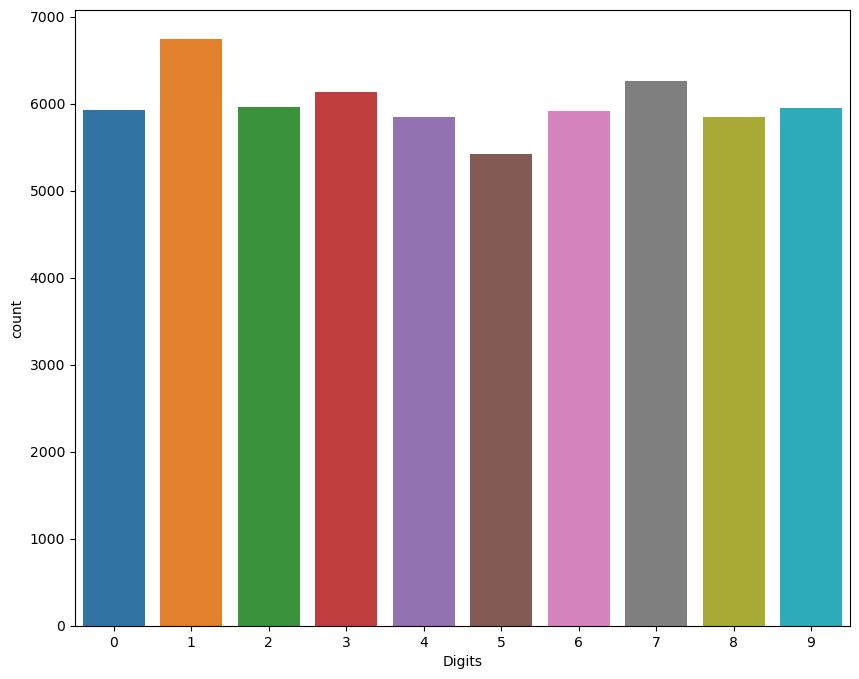

In [3]:
#Barplot of digit vs count
plt.figure(figsize=(10, 8))
plt.xlabel('Digits')
sns.countplot(x=y_train)

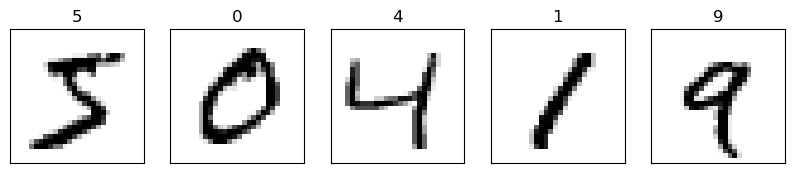

In [4]:
fig, axes = plt.subplots(ncols=5, sharex=False, 
    sharey=True, figsize=(10, 4))
for i in range(5):
    axes[i].set_title(y_train[i])
    axes[i].imshow(x_train[i].reshape(28,28), cmap='gray_r')
    axes[i].get_xaxis().set_visible(False)
    axes[i].get_yaxis().set_visible(False)
plt.show()

In [5]:
print("Shape of the training set: ",x_train.shape)
print("Shape of the test set: ",x_test.shape)

Shape of the training set:  (60000, 28, 28)
Shape of the test set:  (10000, 28, 28)


## Reshaping the dataset

In [6]:
# Reshaping the data
x_train = x_train.reshape(60000, 784) 
x_test = x_test.reshape(10000, 784) 

## One-hot encoding the labels

In [7]:
# One-hot encoding the labels (this makes the data like [0  0  0  1  0  0  0  0  0])
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

## Splitting the training data into training and validation sets

In [8]:
# Splitting the training data into training and validation sets
x_val  = x_train[50000:60000]
x_train = x_train[0:50000]
y_val  = y_train[50000:60000]
y_train = y_train[0:50000]

## Defining the custom MLP function

In [9]:
# Defining the custom MLP function
def mlp(x):
    # Hidden layer 1
    w1 = tf.Variable(tf.random.normal([x.shape[1], 8192]))  # Weight matrix for hidden layer 1
    b1 = tf.Variable(tf.zeros([8192]))  # Bias vector for hidden layer 1
    h1 = tf.matmul(x, w1) + b1  # Linear transformation
    h1 = tf.nn.relu(h1)  # Apply ReLU activation function
    h1 = tf.keras.layers.BatchNormalization()(h1)  # Batch normalization
    
    # Hidden layer 2
    w2 = tf.Variable(tf.random.normal([8192, 512]))  # Weight matrix for hidden layer 2
    b2 = tf.Variable(tf.zeros([512]))  # Bias vector for hidden layer 2
    h2 = tf.matmul(h1, w2) + b2  # Linear transformation
    h2 = tf.nn.relu(h2)  # Apply ReLU activation function
    h2 = tf.keras.layers.BatchNormalization()(h2)  # Batch normalization
    
    # Hidden layer 3
    w3 = tf.Variable(tf.random.normal([512, 64]))  # Weight matrix for hidden layer 3
    b3 = tf.Variable(tf.zeros([64]))  # Bias vector for hidden layer 3
    h3 = tf.matmul(h2, w3) + b3  # Linear transformation
    h3 = tf.nn.relu(h3)  # Apply ReLU activation function
    h3 = tf.keras.layers.BatchNormalization()(h3)  # Batch normalization
    
    # Output layer
    w_out = tf.Variable(tf.random.normal([64, 10]))  # Weight matrix for output layer
    b_out = tf.Variable(tf.zeros([10]))  # Bias vector for output layer
    logits = tf.matmul(h3, w_out) + b_out  # Logits (raw output) of the output layer
    
    return logits

In [10]:
# Defining the input layer
inputs = tf.keras.Input(shape=(784,))

# Calling the custom MLP function
logits = mlp(inputs)

# Applying softmax activation to the logits to obtain class probabilities
outputs = tf.keras.layers.Softmax()(logits)

# Defining the model
model = tf.keras.Model(inputs=inputs, outputs=outputs)

# Defining the optimizer with a custom learning rate
optimizer = tf.keras.optimizers.Adam(learning_rate=0.007)

# Compiling the model
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Printing model summary
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 tf.linalg.matmul (TFOpLambd  (None, 8192)             0         
 a)                                                              
                                                                 
 tf.__operators__.add (TFOpL  (None, 8192)             0         
 ambda)                                                          
                                                                 
 tf.nn.relu (TFOpLambda)     (None, 8192)              0         
                                                                 
 batch_normalization (BatchN  (None, 8192)             32768     
 ormalization)                                                   
                                                             

## Training the model

In [11]:
# Training the model
history = model.fit(x_train, y_train, 
                    validation_data=(x_val, y_val),
                    epochs=15, 
                    batch_size=64)

Epoch 1/15
782/782 [==============================] - 11s 13ms/step - loss: 1.2432 - accuracy: 0.7458 - val_loss: 0.3763 - val_accuracy: 0.8840
Epoch 2/15
782/782 [==============================] - 10s 13ms/step - loss: 0.3732 - accuracy: 0.8840 - val_loss: 0.2738 - val_accuracy: 0.9175
Epoch 3/15
782/782 [==============================] - 10s 13ms/step - loss: 0.2788 - accuracy: 0.9155 - val_loss: 0.2229 - val_accuracy: 0.9344
Epoch 4/15
782/782 [==============================] - 10s 13ms/step - loss: 0.2283 - accuracy: 0.9283 - val_loss: 0.1905 - val_accuracy: 0.9443
Epoch 5/15
782/782 [==============================] - 10s 13ms/step - loss: 0.1931 - accuracy: 0.9400 - val_loss: 0.1786 - val_accuracy: 0.9489
Epoch 6/15
782/782 [==============================] - 10s 13ms/step - loss: 0.1717 - accuracy: 0.9466 - val_loss: 0.1722 - val_accuracy: 0.9518
Epoch 7/15
782/782 [==============================] - 10s 13ms/step - loss: 0.1617 - accuracy: 0.9498 - val_loss: 0.1679 - val_accuracy:

## Evaluating the model on test set

In [12]:
# Evaluating the model on test set
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

313/313 [==============================] - 2s 6ms/step - loss: 0.1815 - accuracy: 0.9568
Test Loss: 0.18152131140232086
Test Accuracy: 0.9567999839782715


## Plotting training and validation loss

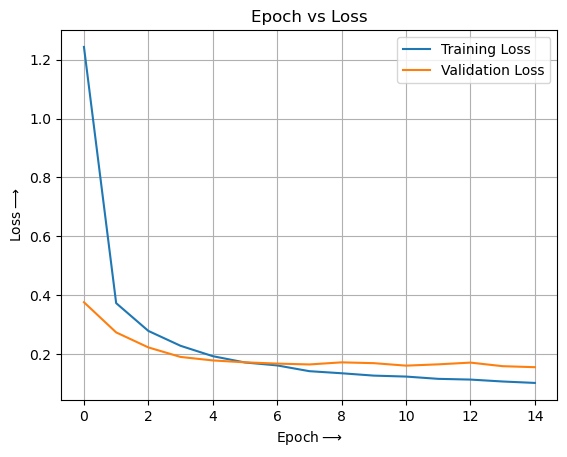

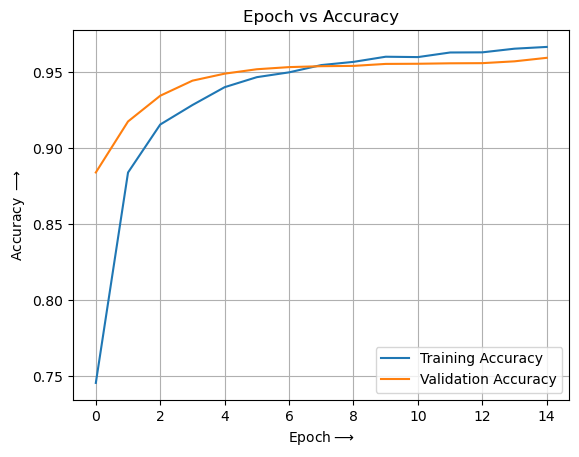

In [18]:
# Plotting training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Epoch vs Loss')
plt.xlabel('Epoch$ \longrightarrow$')
plt.ylabel('Loss$ \longrightarrow$')
plt.legend()
plt.grid()
plt.show()

# Plotting training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Epoch vs Accuracy')
plt.xlabel('Epoch$ \longrightarrow$')
plt.ylabel('Accuracy $\longrightarrow$')
plt.grid()                         
plt.legend()
plt.show()

313/313 [==============================] - 2s 6ms/step


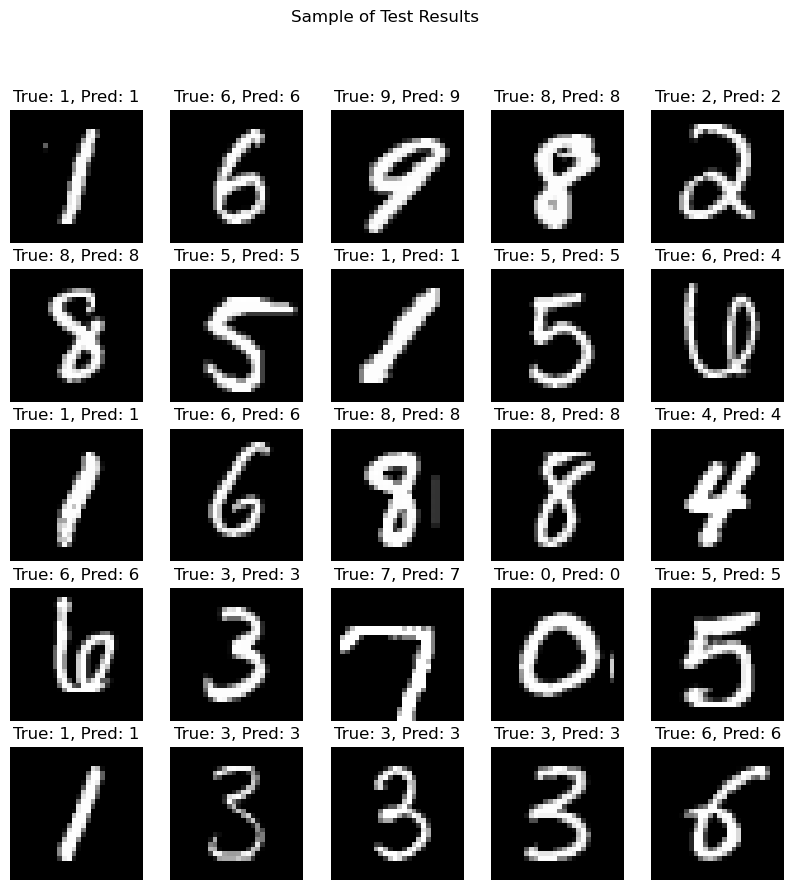

In [14]:
# Predicted labels for the test dataset
y_pred = np.argmax(model.predict(x_test), axis=1)
y_true = np.argmax(y_test, axis=1)

# Plot a random sample of test images along with their predicted and true labels
plt.figure(figsize=(10, 10))
for i, idx in enumerate(np.random.choice(range(len(x_test)), size=25, replace=False)):
    plt.subplot(5, 5, i + 1)
    plt.imshow(x_test[idx].reshape(28, 28), cmap='gray')
    plt.title(f'True: {y_true[idx]}, Pred: {y_pred[idx]}')
    plt.axis('off')
plt.suptitle('Sample of Test Results')
plt.show()

313/313 [==============================] - 2s 6ms/step


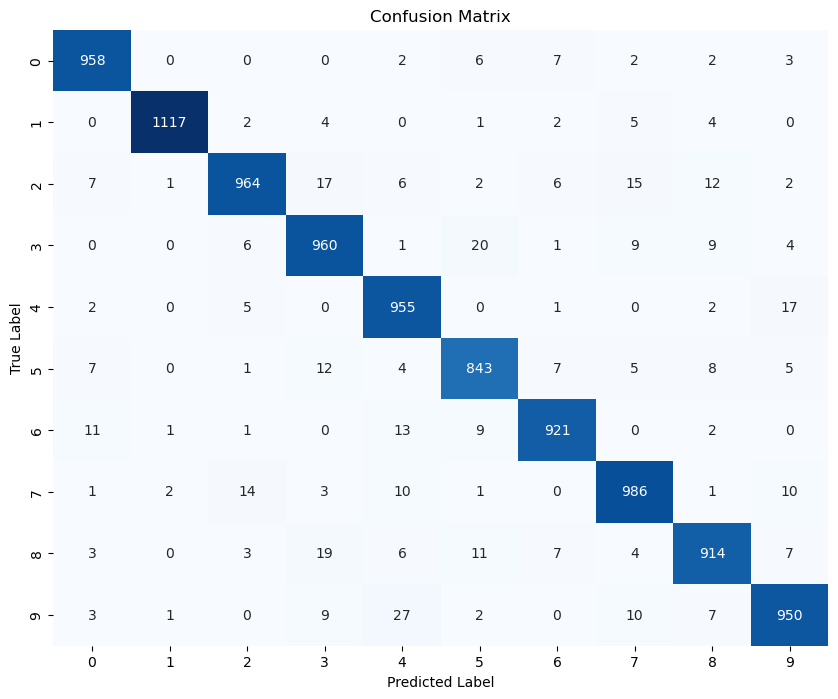

In [20]:
# Getting predicted labels
y_pred = model.predict(x_test)
y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = np.argmax(y_test, axis=1)

# Computing confusion matrix
conf_mat = confusion_matrix(y_true_labels, y_pred_labels)

# Plotting confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

313/313 [==============================] - 2s 5ms/step


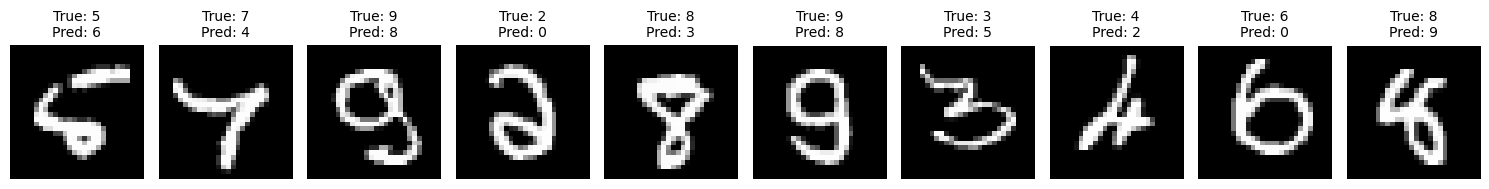

In [16]:
# Evaluate the model on the test set
y_pred = np.argmax(model.predict(x_test), axis=1)
misclassified_idx = np.where(y_pred != np.argmax(y_test, axis=1))[0]

# Plot the misclassified examples
num_samples = min(10, len(misclassified_idx))
plt.figure(figsize=(15, 4))
for i in range(num_samples):
    idx = misclassified_idx[i]
    plt.subplot(1, num_samples, i + 1)
    plt.imshow(x_test[idx].reshape(28, 28), cmap='gray')
    plt.title(f'True: {np.argmax(y_test[idx])}\nPred: {y_pred[idx]}', fontsize=10)
    plt.axis('off')
plt.tight_layout()
plt.show()
